In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

Plot invarent set

Y controller


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 10 iterations.
X.A shape: (4, 3)
X.b shape: (4,)
C_inf A shape: (22, 3)
C_inf b shape: (22,)
MPC infeasible: user_limit
[[ 1.99014450e-03  8.65209829e-01  1.67490288e+00  8.21231975e-01
  -3.16453653e-02 -7.83255449e-03  8.99255068e-02  1.39030329e-02
   6.81970190e-02  3.56412809e-02  4.64656176e-02  5.73714426e-02
   2.47293738e-02  7.91013372e-02  3.00176470e-03  1.00828882e-01
  -1.87256848e-02  1.22566889e-01 -4.04550436e-02  1.44295720e-01
  -6.21935599e-02  1.66039773e-01 -8.39486720e-02  1.87777404e-01
  -1.05665816e-01  2.09499753e-01 -1.27388420e-

c:\Users\hippo\anaconda3\envs\mpc2025\Lib\site-packages\cvxpy\problems\problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


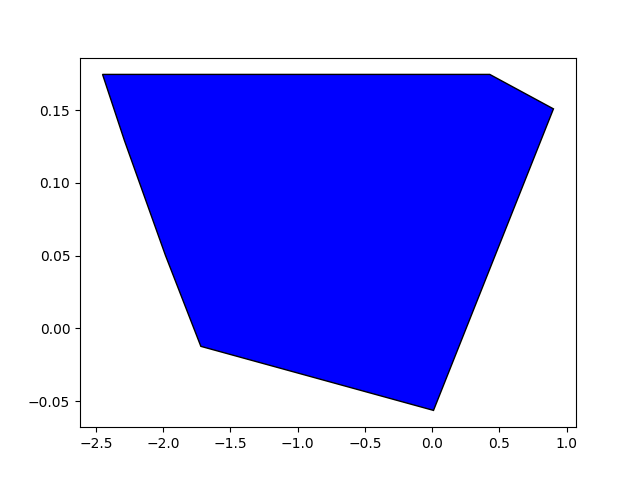

In [3]:
from LinearMPC.MPCControl_yvel import MPCControl_yvel
Ts = 0.05
sim_time = 1
H = 2
x0 = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(0), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               5, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               0, #x [m]
               0, #y [m]
               0  #z [m]
               ])  # initial state 
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc_y = MPCControl_yvel(A, B, xs, us, Ts, H) # Full 12x12 A and 12x4 B matrices
u0, x_traj, u_traj = mpc_y.get_u(x0[mpc_y.x_ids]) # x and u for single subsystem
print(x_traj)

Open loop cell

In [4]:
# Ts = 0.05
# sim_time = 1
# H = 5
# x0 = np.array([0, #wx [rad/s] y-MPC
#                0, #wy [rad/s] x-MPC
#                0, #wz [rad/s] roll-MPC
#                np.deg2rad(0), #alpha [rad] y-MPC
#                np.deg2rad(0), #beta [rad] x-MPC
#                np.deg2rad(0), #gamma [rad] roll-MPC
#                0, #vx [m/s] x-MPC
#                5, #vy [m/s] y-MPC
#                0, #vz [m/s] z-MPC
#                0, #x [m]
#                0, #y [m]
#                0  #z [m]
#                ])  # initial state       

# rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
# mpc = MPCVelControl().new_controller(rocket, Ts, H)
# t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
#     mpc, sim_time, H, x0, method="linear"
# )

# print(t_ol[:-1].shape, x_ol[:,:-1].shape, u_ol.shape)
# print(u_ol[:,:,:].shape)
# print(x_ol[:,:,:-1].shape)
# print(t_ol[:,:-1].shape)
# vis = RocketVis(rocket, rocket_obj_path)
# vis.anim_rate = 1.0

# vis.animate(t_ol[:-1, :-1], x_ol[:,:-1,:-1], u_ol); 



Close loop cell

Maximum invariant set successfully computed after 10 iterations.
X.A shape: (4, 3)
X.b shape: (4,)
C_inf A shape: (22, 3)
C_inf b shape: (22,)






































































































AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=99, step=2), IntSlider(value=0,…

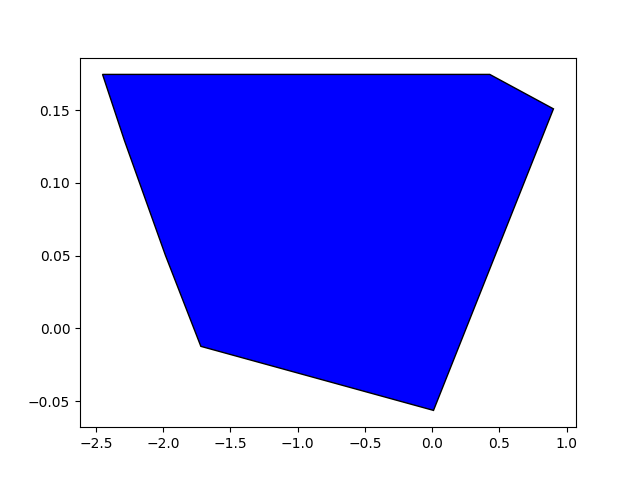

In [5]:
Ts = 0.05
sim_time = 5
H = 5
x0 = np.array([0, #wx [rad/s] y-MPC
               0, #wy [rad/s] x-MPC
               0, #wz [rad/s] roll-MPC
               np.deg2rad(0), #alpha [rad] y-MPC
               np.deg2rad(0), #beta [rad] x-MPC
               np.deg2rad(0), #gamma [rad] roll-MPC
               0, #vx [m/s] x-MPC
               5, #vy [m/s] y-MPC
               0, #vz [m/s] z-MPC
               0, #x [m]
               0, #y [m]
               0  #z [m]
               ])  # initial state       

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)
#print(mpc.get_u(0,x0))
t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);